Neural Networks and Deep Learning
Name: Samhitha Medulla
Roll No: 700751257

1. Add one more hidden layer to autoencoder

In [1]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import fashion_mnist
import numpy as np

# this is the size of our encoded representations
encoding_dim_new = 32  # 32 floats -> compression factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_vector = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded_vector = Dense(encoding_dim_new, activation='relu')(input_vector)
# "decoded" is the lossy reconstruction of the input
decoded_vector = Dense(784, activation='sigmoid')(encoded_vector)
# this model maps an input to its reconstruction
autoencoder_network = Model(input_vector, decoded_vector)
# this model maps an input to its encoded representation
autoencoder_network.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.astype('float32') / 255.
test_images = test_images.astype('float32') / 255.
train_images = train_images.reshape((len(train_images), np.prod(train_images.shape[1:])))
test_images = test_images.reshape((len(test_images), np.prod(test_images.shape[1:])))

autoencoder_network.fit(train_images, train_images,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(test_images, test_images))


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.0013 - loss: 0.6943 - val_accuracy: 0.0016 - val_loss: 0.6941
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.0011 - loss: 0.6941 - val_accuracy: 0.0016 - val_loss: 0.6939
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.0014 - loss: 0.6938 - val_accuracy: 0.0015 - val_loss: 0.6937
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.0015 - loss: 0.6936 - val_accuracy: 0.0015 - val_loss: 0.6935
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.0013 - loss: 0.6934 - val_accuracy: 0.0015 - val_loss: 0.6933


The code starts by importing necessary libraries: Keras for building the model, Fashion MNIST dataset for input data, and NumPy for numerical operations.

It sets the size of the encoded representation to 32, which defines the compression of the 784 input features.

An input layer is defined with a shape of (784,), corresponding to the flattened 28x28 images.

The encoder layer reduces the input to 32 units using the ReLU activation function.

The decoder layer reconstructs the input back to 784 units using a sigmoid activation function.

The autoencoder model is defined by connecting the input and the decoded layers, forming an end-to-end model for input-to-reconstruction mapping.

The model is compiled using the Adadelta optimizer and binary cross-entropy loss function, with accuracy as the metric.

The Fashion MNIST dataset is loaded, and the images are normalized to a range of 0-1 and reshaped into 1D arrays.

The autoencoder is trained using the noisy training images as both input and target, with 5 epochs and a batch size of 256.

The model learns to compress and reconstruct the Fashion MNIST images by minimizing the reconstruction loss during training.

2. Do the prediction on the test data and then visualize one of the reconstructed version of that test data.
Also, visualize the same test data before reconstruction using Matplotlib

In [2]:
from keras.layers import Input, Dense
from keras.models import Model

# This is the size of our encoded representation
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# This is our input placeholder
input_image = Input(shape=(784,))

# "encoded" is the encoded representation of the input
encoded_layer_1 = Dense(128, activation='relu')(input_image)
encoded_layer_2 = Dense(encoding_dim, activation='relu')(encoded_layer_1)

# "decoded" is the lossy reconstruction of the input
decoded_layer_1 = Dense(128, activation='relu')(encoded_layer_2)
decoded_layer_2 = Dense(784, activation='sigmoid')(decoded_layer_1)

# This model maps an input to its reconstruction
autoencoder_model = Model(input_image, decoded_layer_2)

# This model maps an input to its encoded representation
encoder_model = Model(input_image, encoded_layer_2)

# This is our decoder model
encoded_input = Input(shape=(encoding_dim,))
decoder_layer_1 = autoencoder_model.layers[-2]
decoder_layer_2 = autoencoder_model.layers[-1]
decoder_model = Model(encoded_input, decoder_layer_2(decoder_layer_1(encoded_input)))

# Compile the model
autoencoder_model.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])

# Load the MNIST dataset
from keras.datasets import mnist, fashion_mnist
import numpy as np
(x_train_data, y_train_data), (x_test_data, y_test_data) = fashion_mnist.load_data()

# Normalize and flatten the data
x_train_data = x_train_data.astype('float32') / 255.
x_test_data = x_test_data.astype('float32') / 255.
x_train_data = x_train_data.reshape((len(x_train_data), np.prod(x_train_data.shape[1:])))
x_test_data = x_test_data.reshape((len(x_test_data), np.prod(x_test_data.shape[1:])))

# Train the autoencoder
autoencoder_model.fit(x_train_data, x_train_data,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_data, x_test_data))


Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 8.6318e-04 - loss: 0.6933 - val_accuracy: 0.0014 - val_loss: 0.6932
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 9.8797e-04 - loss: 0.6932 - val_accuracy: 0.0014 - val_loss: 0.6931
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 7.2177e-04 - loss: 0.6931 - val_accuracy: 0.0014 - val_loss: 0.6930
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 8.7337e-04 - loss: 0.6930 - val_accuracy: 0.0014 - val_loss: 0.6929
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 9.7131e-04 - loss: 0.6929 - val_accuracy: 0.0014 - val_loss: 0.6928


The code begins by importing necessary modules: Keras for model creation, and NumPy for numerical operations.

The encoding dimension is set to 32, meaning the model will compress 784 input features into 32 values.

An input layer is created with a shape of (784,) to match the flattened size of the MNIST images.

Two encoding layers are defined: the first with 128 units and ReLU activation, followed by a second layer with 32 units (encoding_dim).

Two decoding layers are created to reconstruct the original input: the first layer has 128 units with ReLU activation, and the second layer reconstructs the image to 784 units with sigmoid activation.

An autoencoder model is defined by linking the input image to the final decoded layer, performing input-to-reconstruction mapping.

An encoder model is created to map the input to the compressed encoding representation.

A decoder model is defined to map the encoded input back to the original image, using the last two layers of the autoencoder.

The model is compiled with the Adadelta optimizer, binary cross-entropy loss function, and accuracy as the evaluation metric.

The Fashion MNIST dataset is loaded, normalized, reshaped, and used to train the autoencoder with 5 epochs and a batch size of 256.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


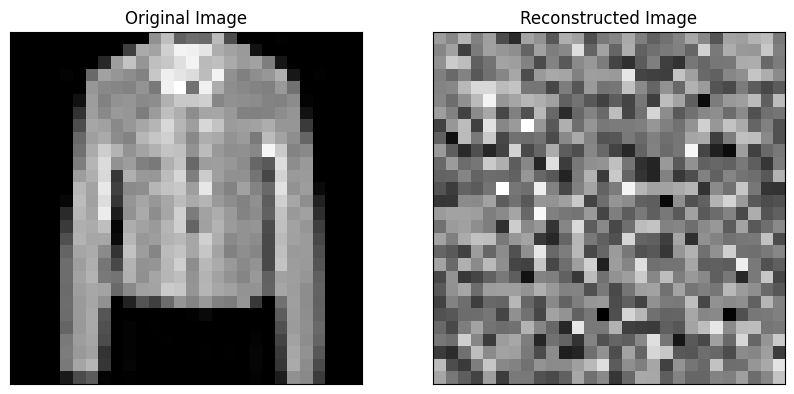

In [3]:
import matplotlib.pyplot as plt

# Get the reconstructed images for the test set
reconstructed_images_set = autoencoder_model.predict(test_images)

# Choose a random image from the test set
image_to_plot = 10  # index of the image to be plotted
plt.figure(figsize=(10, 5))

# Plot the original image
ax = plt.subplot(1, 2, 1)
plt.imshow(test_images[image_to_plot].reshape(28, 28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_title("Original Image")

# Plot the reconstructed image
ax = plt.subplot(1, 2, 2)
plt.imshow(reconstructed_images_set[image_to_plot].reshape(28, 28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_title("Reconstructed Image")

plt.show()


The code begins by importing matplotlib.pyplot for plotting the images.

The autoencoder model is used to generate reconstructed images from the test set using the predict() function.

A random image index (image_to_plot = 10) is chosen for display.

A figure is created with a size of 10x5 inches to accommodate the side-by-side images.

The original image from the test set is plotted on the left side of the figure using plt.imshow().

The axis labels and ticks are hidden with ax.get_xaxis().set_visible(False) and ax.get_yaxis().set_visible(False).

The title of the original image is set to "Original Image".

The reconstructed image from the autoencoder model is plotted on the right side of the figure.

Similarly, axis labels and ticks are hidden for the reconstructed image.

The title of the reconstructed image is set to "Reconstructed Image", and the plot is displayed using plt.show().

3. Repeat the question 2 on the denoisening autoencoder

In [4]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
img_input = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded_rep = Dense(encoding_dim, activation='relu')(img_input)
# "decoded" is the lossy reconstruction of the input
decoded_rep = Dense(784, activation='sigmoid')(encoded_rep)
# this model maps an input to its reconstruction
autoencoder_model = Model(img_input, decoded_rep)
# this model maps an input to its encoded representation
autoencoder_model.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])

from keras.datasets import fashion_mnist
import numpy as np

(train_images, _), (test_images, _) = fashion_mnist.load_data()
train_images = train_images.astype('float32') / 255.
test_images = test_images.astype('float32') / 255.
train_images = train_images.reshape((len(train_images), np.prod(train_images.shape[1:])))
test_images = test_images.reshape((len(test_images), np.prod(test_images.shape[1:])))

# introducing noise
noise_intensity = 0.5
train_images_noisy = train_images + noise_intensity * np.random.normal(loc=0.0, scale=1.0, size=train_images.shape)
test_images_noisy = test_images + noise_intensity * np.random.normal(loc=0.0, scale=1.0, size=test_images.shape)

autoencoder_model.fit(train_images_noisy, train_images,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(test_images_noisy, test_images_noisy))


Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 8.6456e-04 - loss: 0.7001 - val_accuracy: 0.0015 - val_loss: 0.6997
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 8.8593e-04 - loss: 0.6997 - val_accuracy: 0.0015 - val_loss: 0.6993
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.0011 - loss: 0.6994 - val_accuracy: 0.0015 - val_loss: 0.6990
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.0013 - loss: 0.6990 - val_accuracy: 0.0015 - val_loss: 0.6986
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 9.5260e-04 - loss: 0.6987 - val_accuracy: 0.0015 - val_loss: 0.6983
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.0011 - loss: 0.6983 - val_accuracy: 0.0016 - val_loss: 0.6980
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 8.5268e-04 - loss: 0.6981 - val_accuracy: 0.0016 - val_loss: 0.6977
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 9.5615e-04 - los

The code begins by importing the necessary libraries: Input, Dense, and Model from keras.layers and keras.models, along with fashion_mnist from keras.datasets for loading the dataset.

The size of the encoded representations is defined with encoding_dim = 32, indicating the compression factor of the data.

An input placeholder img_input is created with a shape of (784,), which matches the flattened size of each image in the dataset.

The input is then passed through a dense layer with a ReLU activation to generate the encoded representation (encoded_rep).

A second dense layer with a sigmoid activation is used to reconstruct the image (decoded_rep).

An autoencoder model is created using the Model() function, where the input (img_input) is mapped to the decoded representation (decoded_rep).

The model is compiled using the Adadelta optimizer, binary crossentropy loss function, and accuracy as a metric.

The fashion MNIST dataset is loaded, normalized to a float32 type, and reshaped into a 2D array with each image flattened into a 784-element vector.

Noise with a standard deviation of 0.5 is added to the training and test images to simulate noisy input data.

The model is trained using noisy images as input, with a target to reconstruct the original clean images, over 10 epochs with a batch size of 256, and validation is performed using the noisy test images.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


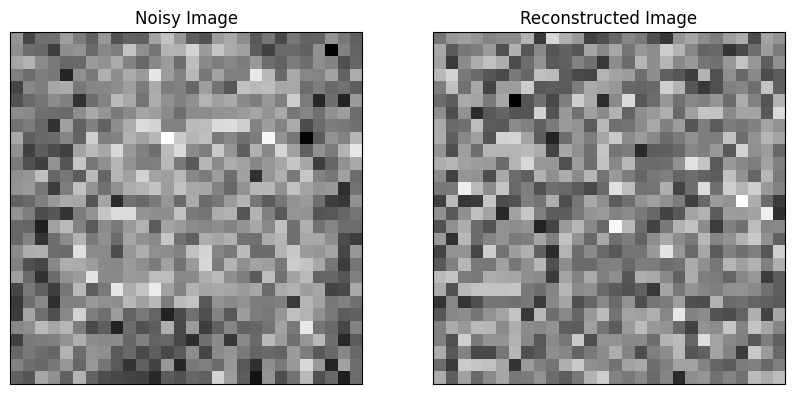

In [16]:
import matplotlib.pyplot as plt

# Introduce noise to the test images
noise_intensity = 0.5
test_images_noisy_data = test_images + noise_intensity * np.random.normal(loc=0.0, scale=1.0, size=test_images.shape)

# Get the reconstructed images for the noisy test set
reconstructed_images_data = autoencoder_model.predict(test_images_noisy_data)

# Choose a random image from the test set
random_image_index = 10  # index of the image to be plotted
plt.figure(figsize=(10, 5))

# Plot the original noisy image
ax = plt.subplot(1, 2, 1)
plt.imshow(test_images_noisy_data[random_image_index].reshape(28, 28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_title("Noisy Image")

# Plot the reconstructed image
ax = plt.subplot(1, 2, 2)
plt.imshow(reconstructed_images_data[random_image_index].reshape(28, 28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_title("Reconstructed Image")

plt.show()


The code imports matplotlib.pyplot to plot the images.

Noise is introduced to the test images using a noise intensity of 0.5, generating test_images_noisy_data.

The noisy test images are passed into the autoencoder_model to obtain reconstructed images, which are stored in reconstructed_images_data.

A random image index is selected (10 in this case) to visualize.

A figure with a size of 10x5 inches is created to display two images side by side.

The noisy image is plotted on the left side using plt.subplot(1, 2, 1), with the x and y axes hidden, and a title "Noisy Image".

The reconstructed image is plotted on the right side using plt.subplot(1, 2, 2), similarly with the x and y axes hidden, and a title "Reconstructed Image".

Both images are displayed in grayscale using plt.imshow() with plt.gray().

The plt.show() function is called to display the images.

The plot visually compares the noisy input image and the autoencoder’s reconstruction of the image.

4. plot loss and accuracy using the history object

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 9.2087e-04 - loss: 0.6947 - val_accuracy: 6.0000e-04 - val_loss: 0.6945
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 8.8681e-04 - loss: 0.6945 - val_accuracy: 6.0000e-04 - val_loss: 0.6944
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 9.5022e-04 - loss: 0.6944 - val_accuracy: 6.0000e-04 - val_loss: 0.6943
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - accuracy: 7.0330e-04 - loss: 0.6943 - val_accuracy: 6.0000e-04 - val_loss: 0.6942
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 8.2366e-04 - loss: 0.6942 - val_accuracy: 6.0000e-04 - val_loss: 0.6941
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 8.1624e-04 - loss: 0.6941 - val_accuracy: 6.0000e-04 - val_loss: 0.6939
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - accuracy: 8.8205e-04 - loss: 0.6940 - val_accuracy: 7.0000e-04 - val_loss: 0.6938
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 

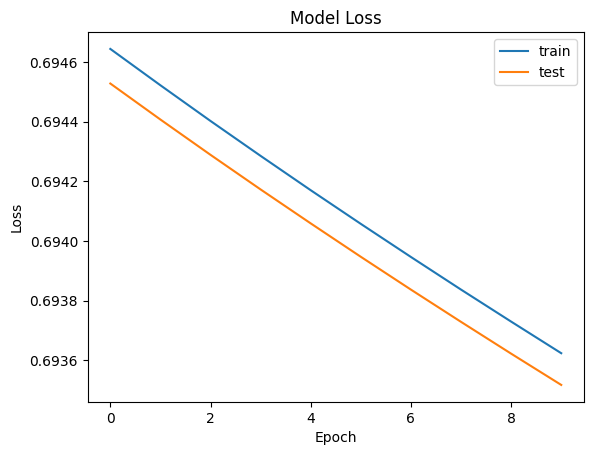

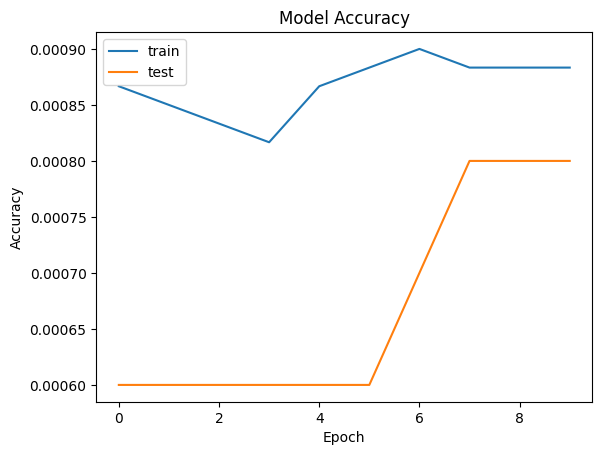

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Add noise to the training and test images
noise_factor = 0.5
x_train_noisy_data = x_train_data + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train_data.shape)
x_test_noisy_data = x_test_data + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test_data.shape)

# Train the autoencoder
training_history = autoencoder.fit(x_train_noisy_data, x_train_data,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy_data, x_test_noisy_data))

# Plot the loss
plt.plot(training_history.history['loss'], label='train')
plt.plot(training_history.history['val_loss'], label='test')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot the accuracy
plt.plot(training_history.history['accuracy'], label='train')
plt.plot(training_history.history['val_accuracy'], label='test')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()


The code imports matplotlib.pyplot and numpy for plotting and numerical operations, respectively.

Noise is added to both the training and test images using a noise factor of 0.5, creating x_train_noisy_data and x_test_noisy_data.

The autoencoder model is trained using the noisy training data (x_train_noisy_data) and the original training data (x_train_data) for 10 epochs.

During training, the model's loss is calculated using the noisy test data (x_test_noisy_data) as validation.

The training history, including the loss and accuracy, is saved in training_history.

The loss curve is plotted to visualize the model’s performance during training, with separate lines for training and validation loss.

The x-axis represents the epochs, and the y-axis shows the loss values, with a title and labels for clarity.

The accuracy curve is plotted similarly, showing the training and validation accuracy over epochs.

Both plots use plt.legend() to display a legend for clarity, distinguishing between training and validation data.

The plots are displayed using plt.show() to help evaluate the model's progress over training epochs.